In [2]:
%matplotlib notebook
from QDP import qdp
import os.path
import numpy as np
from scipy.stats import poisson
import h5py
import matplotlib.pyplot as plt
from scipy.optimize import leastsq,curve_fit

In [3]:
def sin(t,amp,freq,phase,offset):
    res = (amp*np.sin((2*np.pi*freq*t)+phase)) + offset
    return res 

def decaying_sin(t,tau,amp,freq,phase,offset):
    res = (amp*np.exp(-t/tau)*np.sin((2*np.pi*freq*t)+phase)) + offset
    return res 

def est_freq(ydata,tgap,tau,amp,freq,phase,offset): # Estimation of frequency change (from dy/df where y=sinusoidal fit)
    res=(ydata-decaying_sin(tau,tgap,amp,freq,phase,offset))/(amp*np.exp(-tgap/tau)*2*np.pi*tgap*np.cos(2*np.pi*freq*tgap+phase))
    return res

def gaussian(x,amp,x0,sigma,offset):
    res=(amp*np.exp((-(x-x0)**2)/(sigma**2)))+offset
    return res

def make_plots(QDP,retention):
    colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728','#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    fig, ax = plt.subplots()
    for roi in [1,2]:
        error=0
        data = []
        reten = []
        err = []
        for e in range(len(np.squeeze(retention['ivar']))):
            data.append(np.squeeze(retention['ivar'])[e][roi])
            reten.append(np.squeeze(retention['retention'])[e][roi])
            err.append(np.squeeze(retention['error'])[e][roi])
        if QDP.experiments[0]['variable_list']==[]:
            data=range(0,np.size(retention['ivar'],axis=1))
            xlab = 'iteration'
        else:
            xlab = QDP.experiments[0]['variable_desc'][QDP.experiments[0]['variable_list'][0]]['description']
        ax.errorbar(data,reten,yerr=err,label="ROI:{}".format(roi),fmt='o',color=colors[roi])
    plt.show()
    ax.set_ylim(0, 1)
    ax.set_xlabel(xlab)
    ax.set_ylabel('retention')
    ax.set_title(exp_id)
    ax.grid()
    ax.legend()

    ### Beam positions plot, differential

    Xdata=np.squeeze(QDP.get_beampositions()['RedX']+QDP.get_beampositions()['FORTX'])
    Ydata=np.squeeze(QDP.get_beampositions()['RedY']-QDP.get_beampositions()['FORTY'])
    fig, ax = plt.subplots()
    #ax.scatter(Xdata-Xdata[0],Ydata-Ydata[0])
    ax.plot(data,Xdata-Xdata[0],'o',label='Delta X')
    ax.plot(data,Ydata-Ydata[0],'o',label='Delta Y')
    plt.show()
    #ax.set_ylim(0, 1)
    ax.set_xlabel(xlab)
    ax.set_ylabel('Drift @ atom plane(um)')
    ax.set_title(exp_id)
    ax.grid()
    ax.legend()
    
    ### Beam positions plot, Absolute
    
    Xdata_Red=-np.squeeze(QDP.get_beampositions()['RedX'])
    Xdata_FORT=np.squeeze(QDP.get_beampositions()['FORTX'])
    Ydata_Red=np.squeeze(QDP.get_beampositions()['RedY'])
    Ydata_FORT=np.squeeze(QDP.get_beampositions()['FORTY'])
    fig, ax = plt.subplots()
    ax.plot(data,Xdata_Red-np.round(np.nanmedian(Xdata_Red)),'o',label='Red X, offset:{}'.format(np.round(np.nanmedian(Xdata_Red))))
    ax.plot(data,Xdata_FORT-np.round(np.nanmedian(Xdata_FORT)),'o',label='FORT X, offset:{}'.format(np.round(np.nanmedian(Xdata_FORT))))
    ax.plot(data,Ydata_Red-np.round(np.nanmedian(Ydata_Red)),'o',label='Red Y, offset:{}'.format(np.round(np.nanmedian(Ydata_Red))))
    ax.plot(data,Ydata_FORT-np.round(np.nanmedian(Ydata_FORT)),'o',label='FORT Y, offset:{}'.format(np.round(np.nanmedian(Ydata_FORT))))
    plt.show()
    ax.set_xlabel(xlab)
    ax.set_ylabel('atom plane (um)')
    ax.set_title(exp_id)
    ax.grid()
    ax.legend()

# Testing mechanical stability of dual camera. Referenced differently

In [29]:
exp_id='2018_02_13_12_23_32_780 signal on both camera'
data_master_path='D:/Data/' # D:\ is local SSD in the main experiment computer
exp_date="_".join(exp_id.split("_")[:3]) # Date folder name automatically generated from exp name.
exp_path=data_master_path+exp_date+'/'+exp_id+'/'
experiment_file='results.hdf5'
dp=exp_path
cuts = [[450],[450],[450]]
print dp
q = qdp.QDP(base_data_path=dp)
q.load_data_file(experiment_file)
#for r in range(5):
#    q.set_thresholds(cuts, roi=r)
#print q.experiments[0]['variable_list']
#q.get_thresholds()

D:/Data/2018_02_13/2018_02_13_12_23_32_780 signal on both camera/


<IPython.core.display.Javascript object>


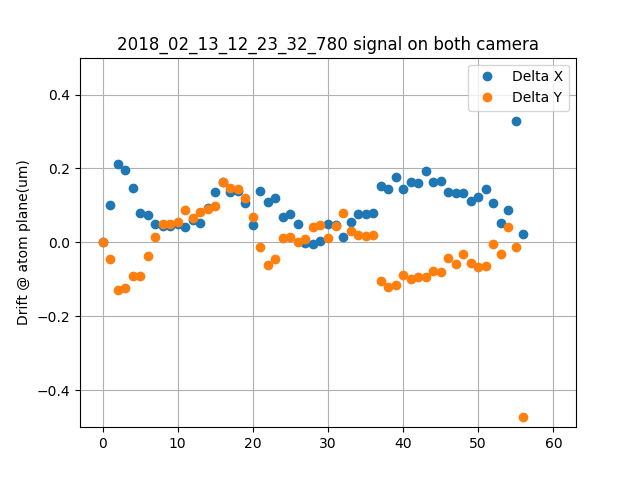

<IPython.core.display.Javascript object>


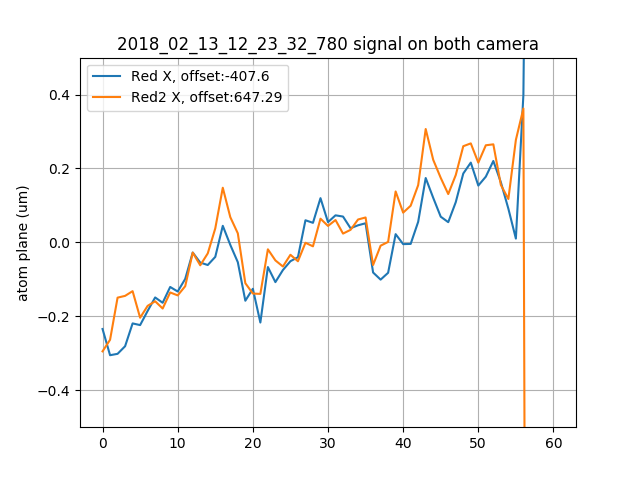

<IPython.core.display.Javascript object>


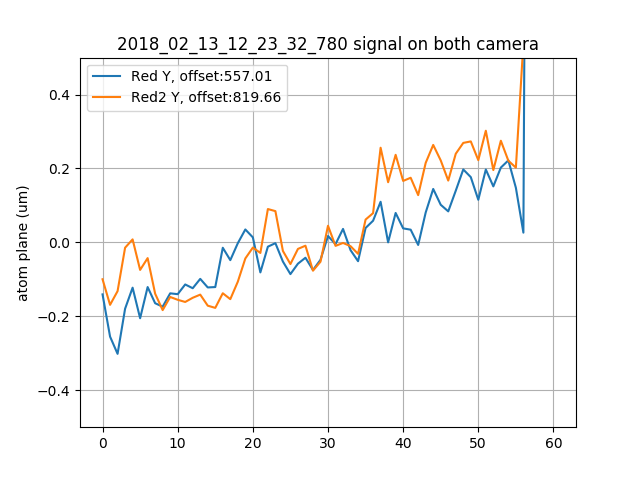

(-0.5, 0.5)

In [30]:
QDP=q
[ylow,yhigh]=[-0.5,0.5];
Xdata=np.squeeze(+QDP.get_beampositions()['RedX']+QDP.get_beampositions()['FORTX'])
data=range(0,len(Xdata))
Ydata=np.squeeze(QDP.get_beampositions()['RedY']-QDP.get_beampositions()['FORTY'])
fig, ax = plt.subplots()
#ax.scatter(Xdata-Xdata[0],Ydata-Ydata[0])
ax.plot(data,Xdata-Xdata[0],'o',label='Delta X')
ax.plot(data,Ydata-Ydata[0],'o',label='Delta Y')
plt.show()
ax.set_ylim(ylow, yhigh)
ax.set_ylabel('Drift @ atom plane(um)')
ax.set_title(exp_id)
ax.grid()
ax.legend()

### Beam positions plot, Absolute
decimals=2
Xdata_Red=-np.squeeze(QDP.get_beampositions()['RedX'])
Xdata_FORT=np.squeeze(QDP.get_beampositions()['FORTX'])
Ydata_Red=np.squeeze(QDP.get_beampositions()['RedY'])
Ydata_FORT=np.squeeze(QDP.get_beampositions()['FORTY'])
fig, ax = plt.subplots()
ax.plot(data,Xdata_Red-np.around(np.nanmedian(Xdata_Red),decimals=decimals),label='Red X, offset:{}'.format(np.around(np.nanmedian(Xdata_Red),decimals=decimals)))
ax.plot(data,Xdata_FORT-np.around(np.nanmedian(Xdata_FORT),decimals=decimals),label='Red2 X, offset:{}'.format(np.around(np.nanmedian(Xdata_FORT),decimals=decimals)))
plt.show()
ax.set_ylabel('atom plane (um)')
ax.set_title(exp_id)
ax.grid()
ax.legend()
ax.set_ylim(ylow, yhigh)

fig, ax = plt.subplots()
ax.plot(data,Ydata_Red-np.around(np.nanmedian(Ydata_Red),decimals=decimals),label='Red Y, offset:{}'.format(np.around(np.nanmedian(Ydata_Red),decimals=decimals)))
ax.plot(data,Ydata_FORT-np.around(np.nanmedian(Ydata_FORT),decimals=decimals),label='Red2 Y, offset:{}'.format(np.around(np.nanmedian(Ydata_FORT),decimals=decimals)))
plt.show()
ax.set_ylabel('atom plane (um)')
ax.set_title(exp_id)
ax.grid()
ax.legend()
ax.set_ylim(ylow, yhigh)

# Testing mechanical stability of dual camera. Referenced to the table

In [26]:
exp_id='2018_02_13_14_32_02_780 signal on both camera, no cage, referenced to table'
data_master_path='D:/Data/' # D:\ is local SSD in the main experiment computer
exp_date="_".join(exp_id.split("_")[:3]) # Date folder name automatically generated from exp name.
exp_path=data_master_path+exp_date+'/'+exp_id+'/'
experiment_file='results.hdf5'
dp=exp_path
cuts = [[450],[450],[450]]
print dp
q = qdp.QDP(base_data_path=dp)
q.load_data_file(experiment_file)
#for r in range(5):
#    q.set_thresholds(cuts, roi=r)
#print q.experiments[0]['variable_list']
#q.get_thresholds()

D:/Data/2018_02_13/2018_02_13_14_32_02_780 signal on both camera, no cage, referenced to table/


<IPython.core.display.Javascript object>


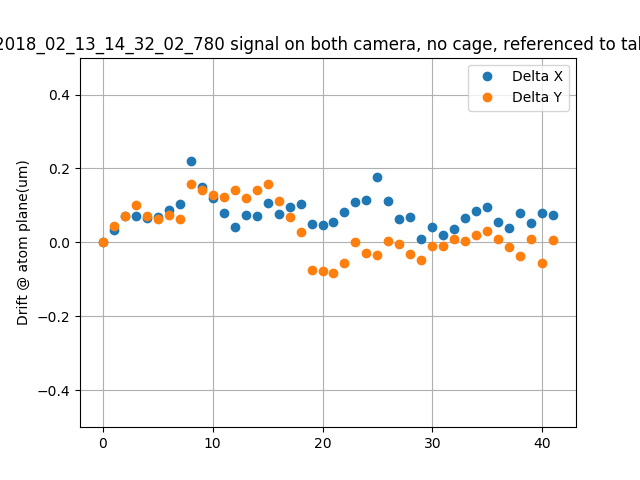

<IPython.core.display.Javascript object>


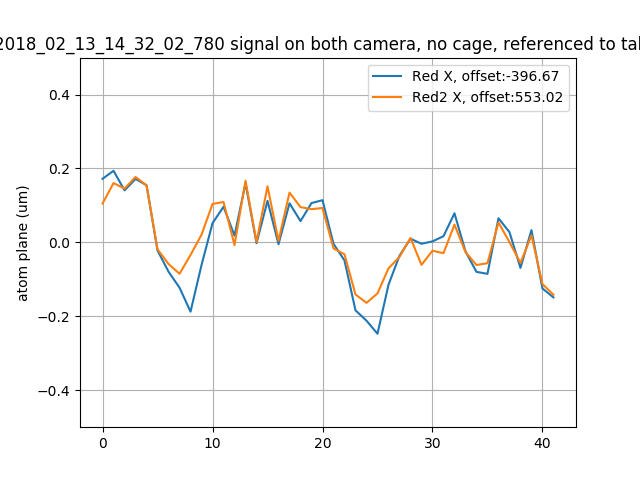

<IPython.core.display.Javascript object>


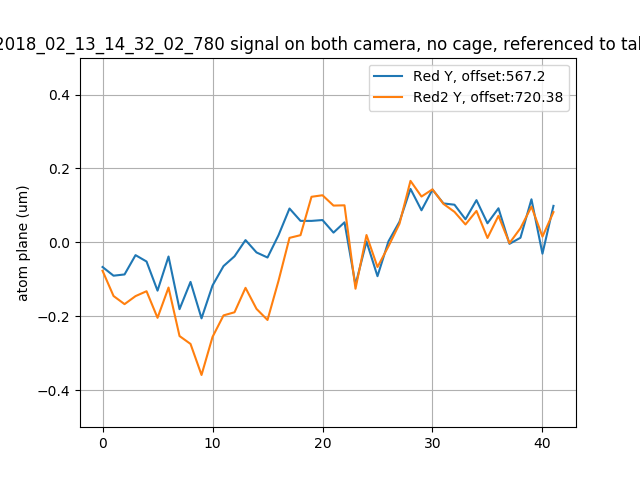

(-0.5, 0.5)

In [28]:
QDP=q
[ylow,yhigh]=[-0.5,0.5];
Xdata=np.squeeze(+QDP.get_beampositions()['RedX']+QDP.get_beampositions()['FORTX'])
data=range(0,len(Xdata))
Ydata=np.squeeze(QDP.get_beampositions()['RedY']-QDP.get_beampositions()['FORTY'])
fig, ax = plt.subplots()
#ax.scatter(Xdata-Xdata[0],Ydata-Ydata[0])
ax.plot(data,Xdata-Xdata[0],'o',label='Delta X')
ax.plot(data,Ydata-Ydata[0],'o',label='Delta Y')
plt.show()
ax.set_ylim(ylow, yhigh)
ax.set_ylabel('Drift @ atom plane(um)')
ax.set_title(exp_id)
ax.grid()
ax.legend()

### Beam positions plot, Absolute
decimals=2
Xdata_Red=-np.squeeze(QDP.get_beampositions()['RedX'])
Xdata_FORT=np.squeeze(QDP.get_beampositions()['FORTX'])
Ydata_Red=np.squeeze(QDP.get_beampositions()['RedY'])
Ydata_FORT=np.squeeze(QDP.get_beampositions()['FORTY'])
fig, ax = plt.subplots()
ax.plot(data,Xdata_Red-np.around(np.nanmedian(Xdata_Red),decimals=decimals),label='Red X, offset:{}'.format(np.around(np.nanmedian(Xdata_Red),decimals=decimals)))
ax.plot(data,Xdata_FORT-np.around(np.nanmedian(Xdata_FORT),decimals=decimals),label='Red2 X, offset:{}'.format(np.around(np.nanmedian(Xdata_FORT),decimals=decimals)))
plt.show()
ax.set_ylabel('atom plane (um)')
ax.set_title(exp_id)
ax.grid()
ax.legend()
ax.set_ylim(ylow, yhigh)

fig, ax = plt.subplots()
ax.plot(data,Ydata_Red-np.around(np.nanmedian(Ydata_Red),decimals=decimals),label='Red Y, offset:{}'.format(np.around(np.nanmedian(Ydata_Red),decimals=decimals)))
ax.plot(data,Ydata_FORT-np.around(np.nanmedian(Ydata_FORT),decimals=decimals),label='Red2 Y, offset:{}'.format(np.around(np.nanmedian(Ydata_FORT),decimals=decimals)))
plt.show()
ax.set_ylabel('atom plane (um)')
ax.set_title(exp_id)
ax.grid()
ax.legend()
ax.set_ylim(ylow, yhigh)

# Testing mechanical stability of dual camera. Referenced to the table

In [31]:
exp_id='2018_02_13_15_06_50_780 signal on both camera, no cage, referenced to table'
data_master_path='D:/Data/' # D:\ is local SSD in the main experiment computer
exp_date="_".join(exp_id.split("_")[:3]) # Date folder name automatically generated from exp name.
exp_path=data_master_path+exp_date+'/'+exp_id+'/'
experiment_file='results.hdf5'
dp=exp_path
cuts = [[450],[450],[450]]
print dp
q = qdp.QDP(base_data_path=dp)
q.load_data_file(experiment_file)
#for r in range(5):
#    q.set_thresholds(cuts, roi=r)
#print q.experiments[0]['variable_list']
#q.get_thresholds()

D:/Data/2018_02_13/2018_02_13_15_06_50_780 signal on both camera, no cage, referenced to table/


<IPython.core.display.Javascript object>


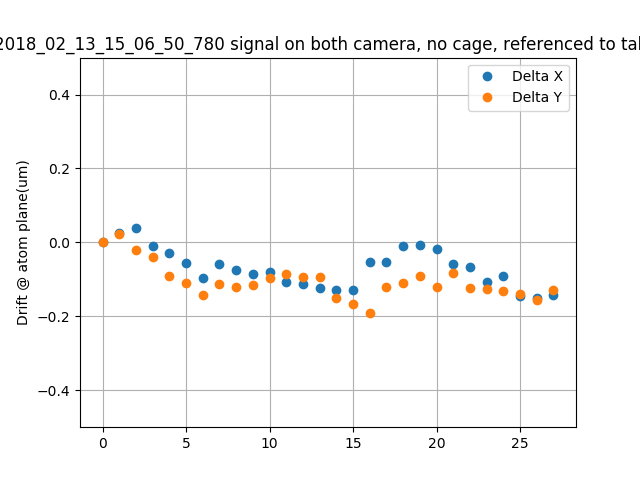

<IPython.core.display.Javascript object>


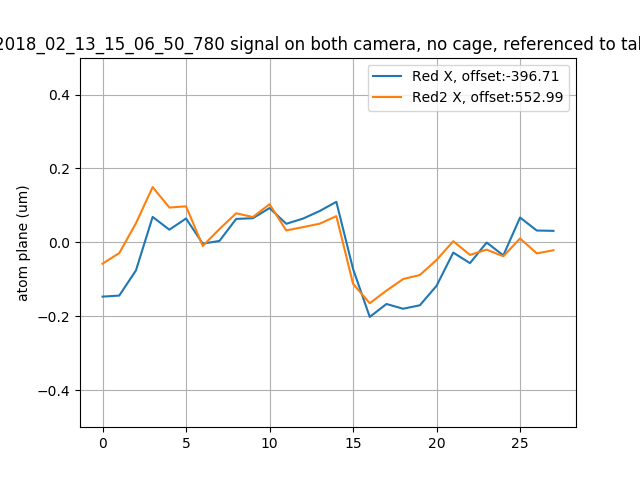

<IPython.core.display.Javascript object>


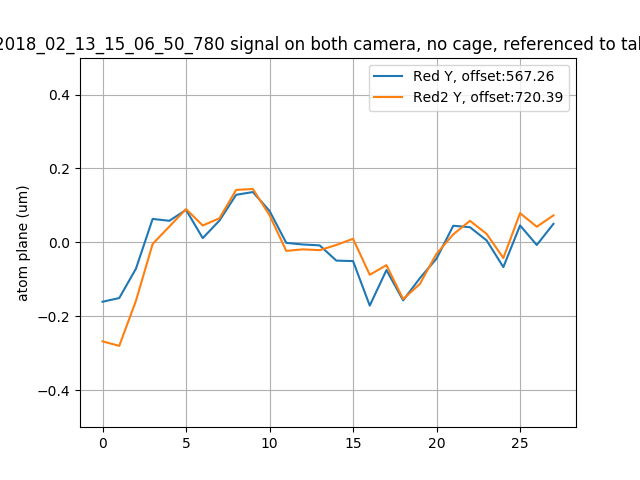

(-0.5, 0.5)

In [32]:
QDP=q
[ylow,yhigh]=[-0.5,0.5];
Xdata=np.squeeze(+QDP.get_beampositions()['RedX']+QDP.get_beampositions()['FORTX'])
data=range(0,len(Xdata))
Ydata=np.squeeze(QDP.get_beampositions()['RedY']-QDP.get_beampositions()['FORTY'])
fig, ax = plt.subplots()
#ax.scatter(Xdata-Xdata[0],Ydata-Ydata[0])
ax.plot(data,Xdata-Xdata[0],'o',label='Delta X')
ax.plot(data,Ydata-Ydata[0],'o',label='Delta Y')
plt.show()
ax.set_ylim(ylow, yhigh)
ax.set_ylabel('Drift @ atom plane(um)')
ax.set_title(exp_id)
ax.grid()
ax.legend()

### Beam positions plot, Absolute
decimals=2
Xdata_Red=-np.squeeze(QDP.get_beampositions()['RedX'])
Xdata_FORT=np.squeeze(QDP.get_beampositions()['FORTX'])
Ydata_Red=np.squeeze(QDP.get_beampositions()['RedY'])
Ydata_FORT=np.squeeze(QDP.get_beampositions()['FORTY'])
fig, ax = plt.subplots()
ax.plot(data,Xdata_Red-np.around(np.nanmedian(Xdata_Red),decimals=decimals),label='Red X, offset:{}'.format(np.around(np.nanmedian(Xdata_Red),decimals=decimals)))
ax.plot(data,Xdata_FORT-np.around(np.nanmedian(Xdata_FORT),decimals=decimals),label='Red2 X, offset:{}'.format(np.around(np.nanmedian(Xdata_FORT),decimals=decimals)))
plt.show()
ax.set_ylabel('atom plane (um)')
ax.set_title(exp_id)
ax.grid()
ax.legend()
ax.set_ylim(ylow, yhigh)

fig, ax = plt.subplots()
ax.plot(data,Ydata_Red-np.around(np.nanmedian(Ydata_Red),decimals=decimals),label='Red Y, offset:{}'.format(np.around(np.nanmedian(Ydata_Red),decimals=decimals)))
ax.plot(data,Ydata_FORT-np.around(np.nanmedian(Ydata_FORT),decimals=decimals),label='Red2 Y, offset:{}'.format(np.around(np.nanmedian(Ydata_FORT),decimals=decimals)))
plt.show()
ax.set_ylabel('atom plane (um)')
ax.set_title(exp_id)
ax.grid()
ax.legend()
ax.set_ylim(ylow, yhigh)

# Testing mechanical stability of dual camera. Referenced to the table. Deliberatly changed temperature.

In [35]:
exp_id='2018_02_13_15_57_07_780 signal on both camera, no cage, referenced to table'
data_master_path='D:/Data/' # D:\ is local SSD in the main experiment computer
exp_date="_".join(exp_id.split("_")[:3]) # Date folder name automatically generated from exp name.
exp_path=data_master_path+exp_date+'/'+exp_id+'/'
experiment_file='results.hdf5'
dp=exp_path
cuts = [[450],[450],[450]]
print dp
q = qdp.QDP(base_data_path=dp)
q.load_data_file(experiment_file)
#for r in range(5):
#    q.set_thresholds(cuts, roi=r)
#print q.experiments[0]['variable_list']
#q.get_thresholds()

D:/Data/2018_02_13/2018_02_13_15_57_07_780 signal on both camera, no cage, referenced to table/


<IPython.core.display.Javascript object>


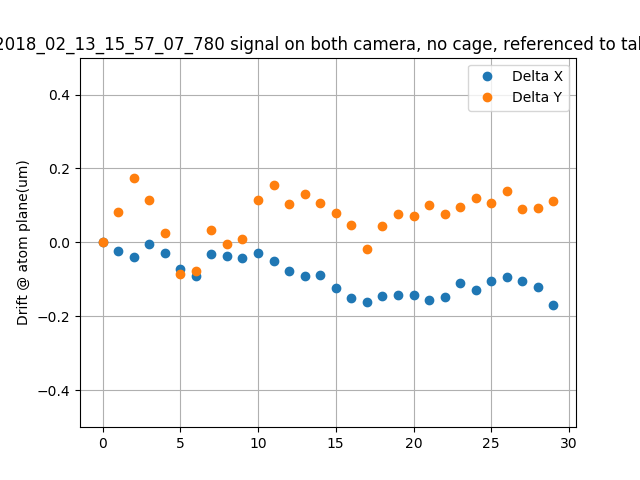

<IPython.core.display.Javascript object>


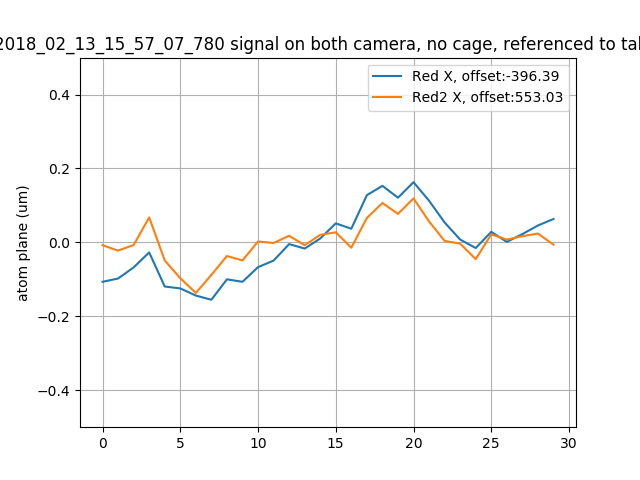

<IPython.core.display.Javascript object>


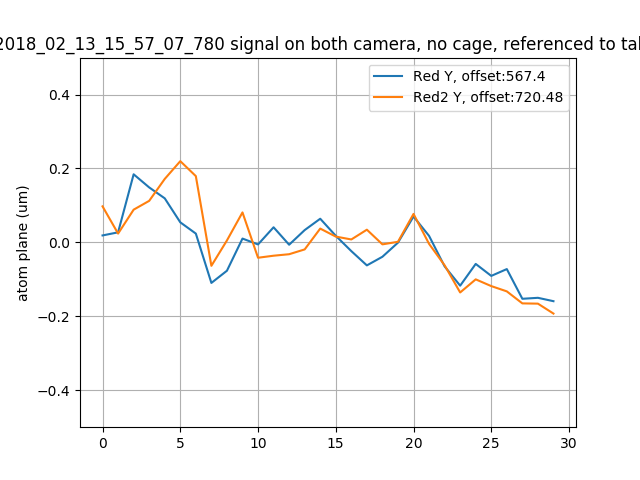

(-0.5, 0.5)

In [36]:
QDP=q
[ylow,yhigh]=[-0.5,0.5];
Xdata=np.squeeze(+QDP.get_beampositions()['RedX']+QDP.get_beampositions()['FORTX'])
data=range(0,len(Xdata))
Ydata=np.squeeze(QDP.get_beampositions()['RedY']-QDP.get_beampositions()['FORTY'])
fig, ax = plt.subplots()
#ax.scatter(Xdata-Xdata[0],Ydata-Ydata[0])
ax.plot(data,Xdata-Xdata[0],'o',label='Delta X')
ax.plot(data,Ydata-Ydata[0],'o',label='Delta Y')
plt.show()
ax.set_ylim(ylow, yhigh)
ax.set_ylabel('Drift @ atom plane(um)')
ax.set_title(exp_id)
ax.grid()
ax.legend()

### Beam positions plot, Absolute
decimals=2
Xdata_Red=-np.squeeze(QDP.get_beampositions()['RedX'])
Xdata_FORT=np.squeeze(QDP.get_beampositions()['FORTX'])
Ydata_Red=np.squeeze(QDP.get_beampositions()['RedY'])
Ydata_FORT=np.squeeze(QDP.get_beampositions()['FORTY'])
fig, ax = plt.subplots()
ax.plot(data,Xdata_Red-np.around(np.nanmedian(Xdata_Red),decimals=decimals),label='Red X, offset:{}'.format(np.around(np.nanmedian(Xdata_Red),decimals=decimals)))
ax.plot(data,Xdata_FORT-np.around(np.nanmedian(Xdata_FORT),decimals=decimals),label='Red2 X, offset:{}'.format(np.around(np.nanmedian(Xdata_FORT),decimals=decimals)))
plt.show()
ax.set_ylabel('atom plane (um)')
ax.set_title(exp_id)
ax.grid()
ax.legend()
ax.set_ylim(ylow, yhigh)

fig, ax = plt.subplots()
ax.plot(data,Ydata_Red-np.around(np.nanmedian(Ydata_Red),decimals=decimals),label='Red Y, offset:{}'.format(np.around(np.nanmedian(Ydata_Red),decimals=decimals)))
ax.plot(data,Ydata_FORT-np.around(np.nanmedian(Ydata_FORT),decimals=decimals),label='Red2 Y, offset:{}'.format(np.around(np.nanmedian(Ydata_FORT),decimals=decimals)))
plt.show()
ax.set_ylabel('atom plane (um)')
ax.set_title(exp_id)
ax.grid()
ax.legend()
ax.set_ylim(ylow, yhigh)